# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/xjin/Desktop/Udacity/SDCND/CarND-Traffic-Sign-Classifier-Project/data/train.p'
testing_file = '/home/xjin/Desktop/Udacity/SDCND/CarND-Traffic-Sign-Classifier-Project/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train, y_test))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

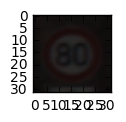

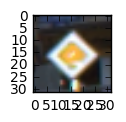

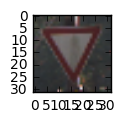

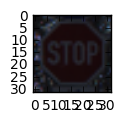

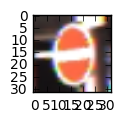

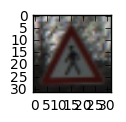

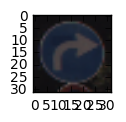

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

X_train_org = X_train
y_train_org = y_train

counters = {}
for i in range(0, n_train):
    l = y_train_org[i]
    if l in counters:
        counters[l].append(i)
    else:
        counters[l] = [i]

'''
print('Counters by sign:')
for s in counters:
    print('%d: %d' % (s, len(counters[s])))
print('\n\n')
'''

X_train_org = X_train

def show_one_sample(label):
    indices = counters[label]
    l = len(indices)
    index = indices[random.randint(0, l)]
    image = X_train_org[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
    #print(label)

# 5,Speed limit (80km/h)
show_one_sample(5)

# 12 Priority roat
show_one_sample(12)

# 13 yield sign
show_one_sample(13)

# 14. stop sign
show_one_sample(14)

# 17,No entry
show_one_sample(17)

# 27,Pedestrians
show_one_sample(27)

# 33,Turn right ahead
show_one_sample(33)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import scipy.ndimage as ndi

def normalize_image(org_img):
    '''
    Normalize an image by ceter to zero mean and divide by stddev
    '''
    img = org_img - np.mean(org_img, axis=(0,1), keepdims=True)
    std = np.std(org_img, axis=(0,1), keepdims=True) + 1e-7
    img = img/(std/10.0)
    return img

X_train, y_train = shuffle(X_train, y_train)

# normalize training data
X_train_normalized = np.empty(X_train.shape, dtype=float)
X_train_float = X_train.astype(float)
#X_train_normalized = X_train_float
for i in range(len(X_train)):
    X_train_normalized[i] = normalize_image(X_train_float[i])
    
# normalize test data
X_test_normalized = np.empty(X_test.shape, dtype=float)
X_test_float = X_test.astype(float)
for i in range(len(X_test)):
    X_test_normalized[i] = normalize_image(X_test_float[i])

# Use 20% as validation, and the remaining 80% as training set
n_validation = int(n_train * 0.2)
n_train_80 = n_train - n_validation

X_validation = X_train_normalized[0:n_validation]
y_validation = y_train[0:n_validation]

print('Validation shape:', X_validation.shape)
print('Validation lables shape:', y_validation.shape)

X_train_80 = X_train_normalized[n_validation:]
y_train_80 = y_train[n_validation:]

def apply_transform(x, transform_matrix, channel_index=2, fill_mode='constant', cval=0.0):
    x = np.rollaxis(x, channel_index, 0)
    final_affine_matrix = transform_matrix[:2, :2]
    final_offset = transform_matrix[:2, 2]
    channel_images = [ndi.interpolation.affine_transform(x_channel, final_affine_matrix,
                      final_offset, order=0, mode=fill_mode, cval=cval) for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_index+1)
    return x

def transform_image(img, angle=0.0, tx=0.0, ty=0.0, zoom=1.0):
    '''
    Transform an image by rotate angle, translate on tx, ty,
    and zoom ratio.
    '''
    theta = angle * np.pi / 180
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    zoom_matrix = np.array([[zoom, 0, 0],
                            [0, zoom, 0],
                            [0, 0, 1]])
    transform_matrix = np.dot(np.dot(rotation_matrix, translation_matrix),
                              zoom_matrix)
    return apply_transform(img, transform_matrix)
    
def augment_image(img):
    '''
    Augment images in various ways
    '''
    images = [img]
    # rotate 5 degrees
    images.append(transform_image(img, angle=5.0))
    # rotate -5 degrees
    images.append(transform_image(img, angle=-5.0))
    # move x by 3
    images.append(transform_image(img, tx=3.0))
    # move x by -3
    images.append(transform_image(img, tx=-3.0))
    # move y by 3
    images.append(transform_image(img, ty=3.0))
    # move y by -3
    images.append(transform_image(img, ty=-3.0))
    # zoom 120%
    images.append(transform_image(img, zoom=1.2))
    # zoom 90%
    images.append(transform_image(img, zoom=0.9))
    return images

def new_shape(shape, times):
    l = list(shape)
    l[0] *= times
    return tuple(l)

print('Training data shape:', X_train_80.shape)
print('Training lables shape:', y_train_80.shape)

augment = True
if augment:
    times = len(augment_image(X_train_80[0]))
    X_train_augmented = np.empty(new_shape(X_train_80.shape, times), X_train_80.dtype)
    y_train_augmented = np.empty(new_shape(y_train_80.shape, times), y_train_80.dtype)
    idx = 0
    for i in range(len(y_train_80)):
        img = X_train_80[i]
        label = y_train_80[i]
        for a_img in augment_image(img):
            X_train_augmented[idx] = a_img
            y_train_augmented[idx] = label
            idx += 1

    X_train_80 = X_train_augmented
    y_train_80 = y_train_augmented
    print('Augmented training data shape:', X_train_80.shape)
    print('Augmented training lables shape:', y_train_80.shape)


Validation shape: (7841, 32, 32, 3)
Validation lables shape: (7841,)
Training data shape: (31368, 32, 32, 3)
Training lables shape: (31368,)
Augmented training data shape: (282312, 32, 32, 3)
Augmented training lables shape: (282312,)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
Shuffle all all training data, and use 80% for training and 20% for validation.

Preprocessing:
1. Normalize each image: center to mean, and divide by standard deviation.
    This is one recommended technique, not sure if I see validation accuracy improvements
    from this one. But it definitely speeds up training by converging to high accuracy
    faster.
2. Augment each image to 9 images: original image, rotate by 5 degrees in two directions,
    horizontal move by 3 pixels in two directions, vertical move by 3 pixels in two
    directions, zoom 120% and 90%. This generates 9 times more training data.
    This one is also recommended, and it improves validation accuracy from 0.99 to 0.995 and
    is significant.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Shuffle all all training data, and use 80% for training and 20% for validation.

Preprocessing:

1. Normalize each image: center to mean, and divide by standard deviation. This is one recommended technique, not sure if I see validation accuracy improvements from this one. But it definitely speeds up training by converging to high accuracy faster.

2. Augment each image to 9 images: original image, rotate by 5 degrees in two directions, horizontal move by 3 pixels in two directions, vertical move by 3 pixels in two directions, zoom 120% and 90%. This generates 9 times more training data. This one is also recommended, and it improves validation accuracy from 0.99 to 0.995 and is significant.

The genrated data is normalized as described, and has 9 times more data.

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1, padding='VALID'):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    #return tf.nn.relu(x)
    return x
    
def LeNet(x, keep_prob):     
    # Hyperparameters
    mu = 0 
    sigma = 0.1
    
    params = []
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x12.
    weights = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 12), mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros(12))
    x = conv2d(x, weights, biases, 1, 'VALID')
    # TODO: Activation.
    x = tf.nn.relu(x)
    params.append(weights)
    params.append(biases)
    
    # TODO: Pooling. Input = 30x30x12. Output = 14x14x12.
    #x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
    #                   strides=[1, 2, 2, 1], padding='VALID')
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 2: Convolutional. Output = 14x14x24.
    weights = tf.Variable(tf.truncated_normal(shape=(3, 3, 12, 24), mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros(24))
    x = conv2d(x, weights, biases, 2, 'VALID') 
    # TODO: Activation.     
    x = tf.nn.relu(x)
    # TODO: Pooling. Input = 12x12x24. Output = 6x6x24.
    #x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
    #                   strides=[1, 2, 2, 1], padding='VALID')
    x = tf.nn.dropout(x, keep_prob)
    params.append(weights)
    params.append(biases)
    
    # Conv Layer 3: input 14x14x24 output = 6x6*48
    weights = tf.Variable(tf.truncated_normal(shape=(3, 3, 24, 48), mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros(48))
    x = conv2d(x, weights, biases, 2, 'VALID') 
    # TODO: Activation.     
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)
    params.append(weights)
    params.append(biases)
        
    # TODO: Flatten. Input = 6x6x48. Output = 864.
    x = tf.reshape(x, [-1, 6*6*48])
    # TODO: Layer 3: Fully Connected. Input = 864. Output = 312
    l3on = 312
    weights = tf.Variable(tf.truncated_normal(shape=(6*6*48, l3on), mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros(l3on))
    x = tf.add(tf.matmul(x, weights), biases)
    # TODO: Activation.
    #x = tf.nn.tanh(x)
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)
    params.append(weights)
    params.append(biases)
    # TODO: Layer 4: Fully Connected. Input = 312. Output = 156.
    l4on = 156
    weights = tf.Variable(tf.truncated_normal(shape=(l3on, l4on), mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros(l4on))
    x = tf.add(tf.matmul(x, weights), biases)
    # TODO: Activation.
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)
    params.append(weights)
    params.append(biases)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    weights = tf.Variable(tf.truncated_normal(shape=(l4on, n_classes), mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros(n_classes))
    logits = tf.add(tf.matmul(x, weights), biases)
    params.append(weights)
    params.append(biases)
    return params, logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

It is a LeNet with the following modifications:

1. Removed all max pooling layers, just use slightly larger convolution feature maps instead,
and this achieves about the same level of validation accuracy.

2. Uses dropout throughout except for the final output. The dropout ratio is 0.8 (80%).

3. Because of using dropout and the extra augmented training data, also made the fully
connected layers larger than before. 312 and 156 neuros for the two FC layers.

In [6]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# dropout
keep_prob = tf.placeholder(tf.float32)

EPOCHS = 30
BATCH_SIZE = 256 # 128

rate = 0.0002 # 0.001
l2_ratio = 0.008

params_list, logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
for params in params_list:
    loss_operation = loss_operation + l2_ratio * tf.nn.l2_loss(params)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(y_train_80)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_80, y_train_80 = shuffle(X_train_80, y_train_80)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_80[offset:end], y_train_80[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
                 
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.5f}".format(validation_accuracy))
        print()
             
    try: 
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.46614

EPOCH 2 ...
Validation Accuracy = 0.81903

EPOCH 3 ...
Validation Accuracy = 0.94542

EPOCH 4 ...
Validation Accuracy = 0.97118

EPOCH 5 ...
Validation Accuracy = 0.97947

EPOCH 6 ...
Validation Accuracy = 0.98533

EPOCH 7 ...
Validation Accuracy = 0.99018

EPOCH 8 ...
Validation Accuracy = 0.98788

EPOCH 9 ...
Validation Accuracy = 0.99018

EPOCH 10 ...
Validation Accuracy = 0.99273

EPOCH 11 ...
Validation Accuracy = 0.99337

EPOCH 12 ...
Validation Accuracy = 0.99248

EPOCH 13 ...
Validation Accuracy = 0.98992

EPOCH 14 ...
Validation Accuracy = 0.99566

EPOCH 15 ...
Validation Accuracy = 0.99273

EPOCH 16 ...
Validation Accuracy = 0.99286

EPOCH 17 ...
Validation Accuracy = 0.99260

EPOCH 18 ...
Validation Accuracy = 0.99452

EPOCH 19 ...
Validation Accuracy = 0.99694

EPOCH 20 ...
Validation Accuracy = 0.99605

EPOCH 21 ...
Validation Accuracy = 0.99541

EPOCH 22 ...
Validation Accuracy = 0.99477

EPOCH 23 ...
Validation Accu

In [7]:
'''
Test set accuracy
'''
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    validation_accuracy = evaluate(X_validation, y_validation)
    print("Validation Accuracy = {:.5f}".format(validation_accuracy))
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.5f}".format(test_accuracy))
    print()

Validation Accuracy = 0.99719
Test Accuracy = 0.95297



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Used AdamOptimizer.

EPOCHS is 30, after 30 epochs, the improvement is not very obvious.

BATCH_SIZE is 256; larger batch size tend to make the training go faster,
but didn't see validation accuracy improvements with batch size of 512,
so uses 256 intead.

rate is 0.0002. This is a low learning rate and is still good, given the
9 times amount of augmented training data, the validation accuracy starts
high from the first epoch and is at 0.99 or so at the 10th epoch already.
A low learning rate makes sense here.

l2_ratio is 0.008, this is for the L2 weight decay regularization. Another
type of regulariztion on top of dropout.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

It is more of a trial and error by trying all the recommendations.

Removing max pooling because the lecture mentioned it has its drawback and no longer in fashion (:)).
So tried without it, the results are actually okay.

Used dropout as recommended or described in the lecture. Used L2 weight decay as recommended.

One accuracy is from image augmentation, this is also recommended. Thought of ways to augment it,
some wouldn't make sense for a traffic sign, say flipping it, obviously. Others, like, translation,
and slight rotation, do make sense. This significantly boosted the amount of training data.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

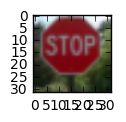

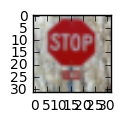

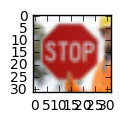

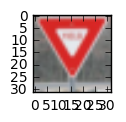

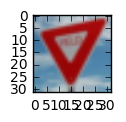

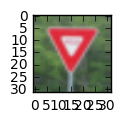

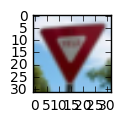

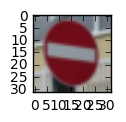

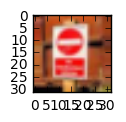

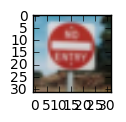

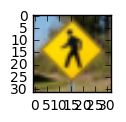

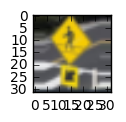

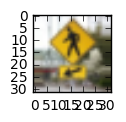

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from scipy import misc

def rescale_image(img):
    '''
    Padding and rescale to 32x32 image
    '''
    x = img.shape[0]
    y = img.shape[1]
    padded_img = img
    if x > y:
        e = int((x-y)/2)
        pads = ((0,0), (e,e), (0,0))
        padded_img = np.pad(img, pads, 'edge')
    elif x < y:
        e = int((y-x)/2)
        pads = ((e,e), (0,0), (0,0))
        padded_img = np.pad(img, pads, 'edge')
    # ‘nearest’, ‘lanczos’, ‘bilinear’, ‘bicubic’ or ‘cubic
    return misc.imresize(padded_img, (32, 32), interp='bilinear')

def plot_image(location):
    img = misc.imread(location)
    resized_img = rescale_image(img)
    image = resized_img.squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
    
plot_image('data/stop1.jpg')
plot_image('data/stop2.jpg')
plot_image('data/stop3.jpg')
plot_image('data/yield1.jpg')
plot_image('data/yield2.jpg')
plot_image('data/yield3.jpg')
plot_image('data/yield4.jpg')
plot_image('data/noentry1.jpg')
plot_image('data/noentry2.jpg')
plot_image('data/noentry3.jpg')
plot_image('data/pedistrian1.jpg')
plot_image('data/pedistrian2.jpg')
plot_image('data/pedistrian3.jpg')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Chose 10 images that are for the stop sign, the yield sign and the no-entry sign. The pedestrian sign doesn't
work, because the pedistrian signs in the US (yellow diamond) are different from the ones in the training set (red triangle).

Some of the traffic signs are rotated at an angle, not directly facing the camera. The backgroud is of different color.

I found cropping the original images is crucial in this step. If the background is too much, it doesn't work well. Probably can try augmenting the training data more to see if this improves or not.

In [9]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
X_new_data = np.empty((10,32,32,3), dtype=np.uint8)
y_new_data = np.empty((10,), dtype=np.uint8)

load_idx = 0

def load_image_data(location, label):
    global load_idx
    img = misc.imread(location)
    X_new_data[load_idx] = rescale_image(img)
    y_new_data[load_idx] = label
    load_idx = load_idx + 1

load_image_data('data/stop1.jpg', 14)
load_image_data('data/stop2.jpg', 14)
load_image_data('data/stop3.jpg', 14)
load_image_data('data/yield1.jpg', 13)
load_image_data('data/yield2.jpg', 13)
load_image_data('data/yield3.jpg', 13)
load_image_data('data/yield4.jpg', 13)
load_image_data('data/noentry1.jpg', 17)
load_image_data('data/noentry2.jpg', 17)
load_image_data('data/noentry3.jpg', 17)
# US pedistrian signs are of different color (yellow)
# and not the same as in the training data
# load_image_data('data/pedistrian1.jpg', 27)
# load_image_data('data/pedistrian2.jpg', 27)
# load_image_data('data/pedistrian3.jpg', 27)

X_new_data_normalized = np.empty(X_new_data.shape, dtype=float)
X_new_data_float = X_new_data.astype(float)
for i in range(len(X_new_data)):
    X_new_data_normalized[i] = normalize_image(X_new_data_float[i])

predict_label = tf.argmax(logits, 1)

def evaluate_one_by_one(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, 1):
        batch_x, batch_y = X_data[offset:offset+1], y_data[offset:offset+1]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        softmax = sess.run(logits, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        predicted = sess.run(predict_label, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        # print('Case ', offset+1, accuracy, predicted)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

'''
New test data accuracy
'''
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = evaluate(X_new_data_normalized, y_new_data)
    print("Test Accuracy = {:.5f}".format(test_accuracy))
    print()


Test Accuracy = 1.00000



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In the first tries, the model didn't perform well on the original images (with an accuracy of 20 ~ 30%), and there were two reasons:
1. the pedistrian signs are different in the US (used in this test), and the training data has a different style of pedistrian signs. This would account for 30% of the total cases (they all failed)
2. the uncropped original images have a lot of background, and the traffic sign is just a small part of it. This is different from the training set as well, which mostly just have the traffic signs.

So two changes were made: 1. each image is cropped and mostly the sign part is preserved. 2. replaced pedistrian sign cases with 'no-entry' signs. This just makes the accuracy now at 100%.

In [10]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

top_results = tf.nn.top_k (logits, k=5)

def evaluate_top_k(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, 1):
        batch_x, batch_y = X_data[offset:offset+1], y_data[offset:offset+1]
        softmax = sess.run(logits, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        top_5 = sess.run(top_results, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        print('Case %d top 5: %s' % (offset+1, top_5))
        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    evaluate_top_k(X_new_data_normalized, y_new_data)


Case 1 top 5: TopKV2(values=array([[ 18.39825249,   8.73883152,   7.98035288,   7.49147177,
          7.32597017]], dtype=float32), indices=array([[14, 13, 12, 17,  3]], dtype=int32))
Case 2 top 5: TopKV2(values=array([[ 15.12989902,  14.97565365,  13.32391644,   9.75720882,
          6.67284107]], dtype=float32), indices=array([[14, 12, 17, 13, 10]], dtype=int32))
Case 3 top 5: TopKV2(values=array([[ 16.33055687,   8.72760868,   6.93299961,   5.71977377,
          5.46720076]], dtype=float32), indices=array([[14,  3, 15, 13,  0]], dtype=int32))
Case 4 top 5: TopKV2(values=array([[ 35.0376358 ,  16.55849838,  14.20715618,  12.77735519,
          9.75487232]], dtype=float32), indices=array([[13, 12, 14, 35, 17]], dtype=int32))
Case 5 top 5: TopKV2(values=array([[ 30.82095337,  20.45032883,  13.10180664,  12.94438553,
         11.49457264]], dtype=float32), indices=array([[13, 14,  3, 17, 15]], dtype=int32))
Case 6 top 5: TopKV2(values=array([[ 28.29585266,  13.17127895,  10.25340652,   

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Yes, for the test cases, the correct results appear as the first one.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.